## Content


---


1. Loading the Data Set
2. Normalization, Reshape and Label Encoding
3. Train Test Split
4. Convolutional Neural Network
  * What is Convolution Operation?
  * Same Padding
  * Max pooling
  * flattening
  * full connection

5. Implementing with keras
  * Create Model
  * Define Optimizer
  * Compile Model
  * Epochs and Batch Size
  * Data Augmentation
  * Fit the Model
  * Evaluate the Model


In [1]:
# Import Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, csv file I/O (e.g pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Import Warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

# 1. Loading the Data Set

In [2]:
# Loading the data set

# read train
train = pd.read_csv('mnist_train.csv')
print(train.shape)
train.head()

(60000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# read test
test = pd.read_csv('mnist_test.csv')
print(test.shape)
test.head()

(10000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# put labels into y_train variable
y_train = train['label']
# Drop label column
X_train = train.drop(labels = ['label'], axis = 1)

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

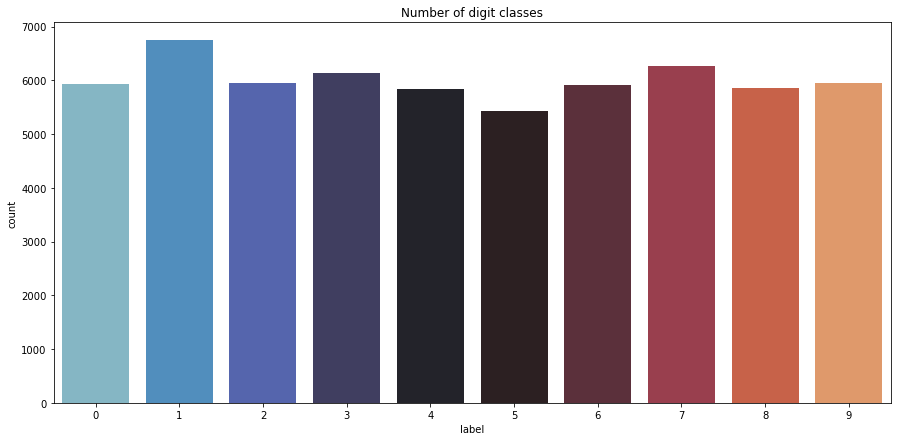

In [5]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
g = sns.countplot(y_train, palette='icefire')
plt.title('Number of digit classes')
y_train.value_counts()

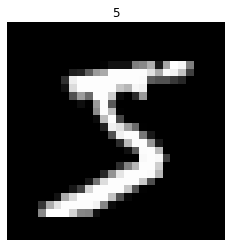

In [6]:
# plot some samples
img = X_train.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(train.iloc[0,0])
plt.axis('off')
plt.show()

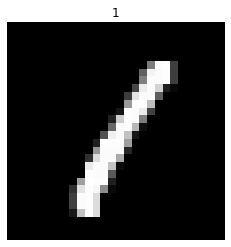

In [7]:
# plot some samples
img = X_train.iloc[3].to_numpy()
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(train.iloc[3,0])
plt.axis('off')
plt.show()

# 2. Normalization, Reshape and Label Encoding
* We perform a grayscale normalization to reduce the effect of illumination's differences.
* If we perform normalization, CNN works faster.

# Reshape
* Train and test images (28 x 28)
* We reshape all data to (28 x 28 x 1) 3D metrices
* as Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel. 

# Label Encoding
* Encode labels to one hot vectors
###e.g
###2 ==> [0,0,1,0,0,0,0,0,0,0]
###4 ==> [0,0,0,0,1,0,0,0,0,0]



In [8]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0
print('X_train shape: ', X_train.shape)
print('test shape: ', test.shape)

X_train shape:  (60000, 784)
test shape:  (10000, 785)


In [9]:
# Reshape
X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
#test = test.values.reshape(10012, 28, 28, 1)
# we cannot use this line because 10012 x 28 x 28 x 1 is 7849408
# but the total number of records we have is 10000 x 785 i.e 7850000
# so the number of both array should be equal (not greater nor smaller)
# thats the reason why we can't use it.

# well actually we can use that line..... how?
#just think about it to match the shape of both arrays we can either 
# delete one col so the remaining col numbers will be 784
# i.e it can be split to 28 x 28

#lets do it

test = test.drop(labels = ['label'], axis = 1)
test = test.values.reshape(10000, 28, 28, 1)

print('X_train shape: ', X_train.shape)
print('test shape: ', test.shape)

X_train shape:  (60000, 28, 28, 1)
test shape:  (10000, 28, 28, 1)


In [10]:
## Label Encoding
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
y_train = to_categorical(y_train, num_classes = 10)

# Train Test Split

* we split the data into train and test sets.
* test size is 10%
* train size is 90%


In [14]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state = 2)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_val.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_val.shape)


X_train shape:  (54000, 28, 28, 1)
X_test shape:  (6000, 28, 28, 1)
y_train shape:  (54000, 10)
y_test shape:  (6000, 10)


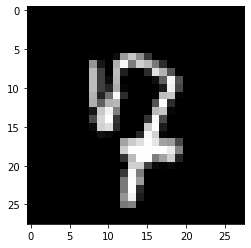

In [15]:
# some examples
plt.imshow(X_train[2][:,:,0], cmap='gray')
plt.show()

# Convolutional Neural Network

* CNN is used for images classification, object detection
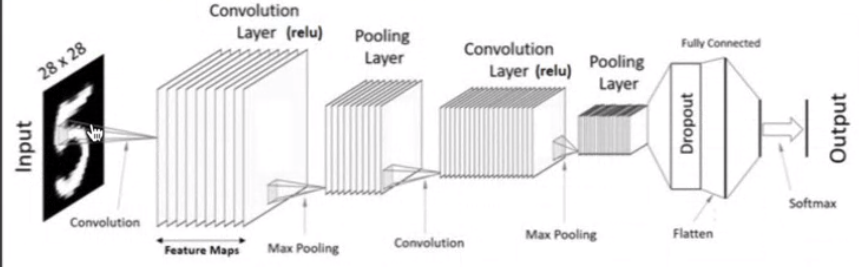

# What is Convolution Operation?

* We have some image and feature detector (3*3)

In [16]:
#
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters=8, kernel_size = (5,5), padding = 'Same', activation = 'relu', 
                 input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
# Drop 25% of nodes
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size= (3,3), padding='Same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
# 256 - because grey scale image has 0-255 i.e 256 values
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))


# Define Optimizer

* Adam optimizer: Change the learning rate

In [17]:
# Define the optimizer
optimizer = Adam(lr = 0.001, beta_1=0.9, beta_2=0.999)

# Compile Model

* categorical crossentropy
* We make binary cross entropy at previous parts and in machine learning tutorial
* At this time we use categorical crossentropy. That means that we have multi class.
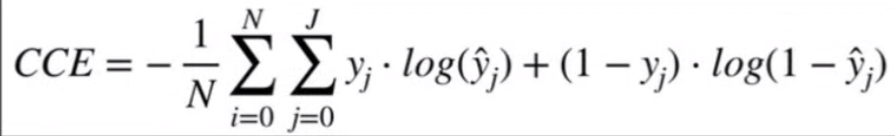

In [18]:
# Compile the model
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])

Epochs and Batch Size

* Say you have a dataset of 10 examples (or samples). You have a batch size of 2, and you've specified you want the algorithm to run for 3 epochs. Therefore in each epoch, you have 5 batches (10/2=5). Each batch gest passed throught the algorithm, therefore you have 5 iterations per epoch.

In [21]:
epochs = 10 # for better result increase the epochs
batch_size = 190

Data Augmentation

* To avoid overfitting problem, we need to expand artificially our handwritten digit dataset
* After the training data with small transformations to reproduce the variabtions of digit.
* For example, the number is not centered The scale is not the same(some who write with big/small numbers)
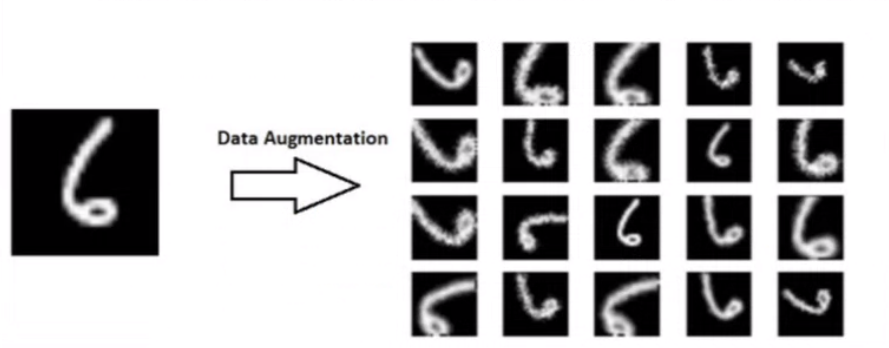

In [20]:
# data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # dimesion reduction
    rotation_range= 5, # randomly rotate images in the range 5 degrees
    zoom_range = 0.1, # Randomly zoom image 10%
    width_shift_range=0.1, # randomly shift images horizontally 10%
    height_shift_range=0.1, # randomly shift images vertically 10%
    horizontal_flip=False, # randomly flip images
    vertical_flip=False) # randomly flip images


datagen.fit(X_train)

# Fit the Model

In [23]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                    epochs = epochs, validation_data = (X_val, y_val),
                    steps_per_epoch=X_train.shape[0] // batch_size)

## If you see that your model isn't showing loss
# so you may have error with your model.fit
# just try to use model.fit_generator

Epoch 1/10
284/284 [==============================] - 22s 73ms/step - loss: 0.8297 - accuracy: 0.7235 - val_loss: 0.1462 - val_accuracy: 0.9590
Epoch 2/10
284/284 [==============================] - 22s 78ms/step - loss: 0.3332 - accuracy: 0.8952 - val_loss: 0.0952 - val_accuracy: 0.9725
Epoch 3/10
284/284 [==============================] - 21s 75ms/step - loss: 0.2536 - accuracy: 0.9212 - val_loss: 0.0788 - val_accuracy: 0.9755
Epoch 4/10
284/284 [==============================] - 20s 69ms/step - loss: 0.2131 - accuracy: 0.9341 - val_loss: 0.0665 - val_accuracy: 0.9802
Epoch 5/10
284/284 [==============================] - 21s 74ms/step - loss: 0.1946 - accuracy: 0.9400 - val_loss: 0.0595 - val_accuracy: 0.9810
Epoch 6/10
284/284 [==============================] - 22s 76ms/step - loss: 0.1758 - accuracy: 0.9461 - val_loss: 0.0515 - val_accuracy: 0.9835
Epoch 7/10
284/284 [==============================] - 23s 80ms/step - loss: 0.1616 - accuracy: 0.9505 - val_loss: 0.0511 - val_accuracy:

# Evaluate the model

* Test Loss visualization
* Confusion matrix

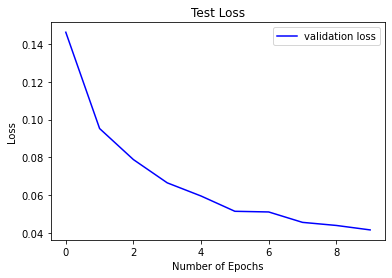

In [24]:
# Plot the loss and accuracy curves for training and validation
plt.plot(history.history['val_loss'], color='b', label='validation loss')
plt.title('Test Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

188/188 [==============================] - 1s 4ms/step


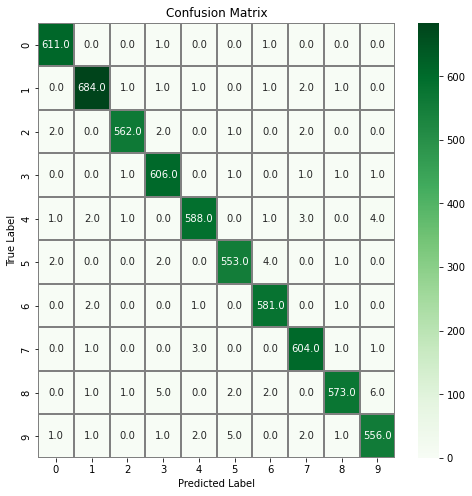

In [25]:
# Confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert validation ovservations to one hot vectors
y_true = np.argmax(y_val, axis=1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
# plt the confusion matrix
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap='Greens', linecolor='gray', fmt='.1f', ax=ax)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()